# Logistic Regression

To begin with, one of the most simplest and widely used algorithms in use is logistic regression. 

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 800
svg_renderer.height = 500
pio.renderers.default = "svg"

## Model without oversample data

In [2]:
# Load the data
df = pd.read_csv('./../../data/engineered_data.csv')

In [3]:
# Drop the index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Before modelinng the data, it is necessary to split the data into training and testing set.

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Model Building

In [5]:
# Declare the logistic regression model
logreg_clf = LogisticRegression(penalty='elasticnet', fit_intercept=True, class_weight='balanced', solver='saga')

# Declare the grid paramters to be searched
logreg_params = dict(
    C = np.logspace(-4, 4, num=9),
    max_iter = [100, 200, 500],
    l1_ratio = [0, 0.3, 0.6, 1]
)

In [ ]:
# Declare the gridsearch object
grid_search = GridSearchCV(logreg_clf, logreg_params, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=5)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

### Inferencing

In [7]:
# Get the best model parameters
print(f"Best score of {grid_search.best_score_} is achieved by using {grid_result.best_params_}")

Best score of 0.8808524070808426 is achieved by using {'C': 1.0, 'l1_ratio': 1, 'max_iter': 500}


In [8]:
# Predict on test data using the model
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)[:, 1]

### Evaluation

In [9]:
# Find the ROC AUC score
print(f"Area under the ROC curve: {roc_auc_score(y_test, y_score)}")

Area under the ROC curve: 0.8827614307972182


In [10]:
# Calculate parameters for roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

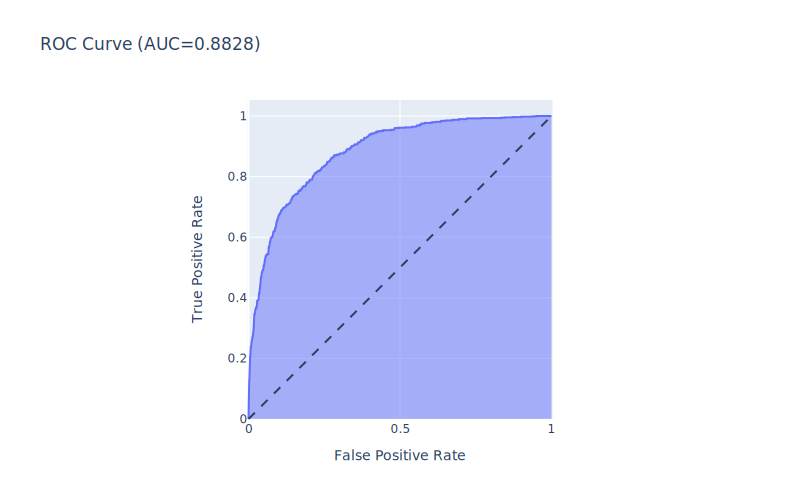

In [11]:
# Plot the curve and area under the curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

An AUC score of 0.88 is quite remarkable and it suggest that model is quite good in predicting whether a project on Kickstarter will be succecssful or not.

In [12]:
# Create a ROC dataframe from the obtained FPR and TPR
roc_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'threshold': thresholds
})

In [13]:
# Get the values of threshold for true positive rate between 0.79 and 0.81
roc_df[roc_df['tpr'].between(0.79, 0.81)]

,fpr,tpr,threshold
414,0.203721,0.790194,0.480285
415,0.209924,0.790194,0.478786
416,0.209924,0.791334,0.478741
417,0.210401,0.791334,0.478728
418,0.210401,0.793615,0.478604
419,0.210878,0.793615,0.478540
420,0.210878,0.797035,0.478181
421,0.211355,0.797035,0.478149
422,0.211355,0.799316,0.477601
423,0.212309,0.799316,0.477546


From the above table, it is safe to assume the threshold value of 0.5 for classifying the observations.

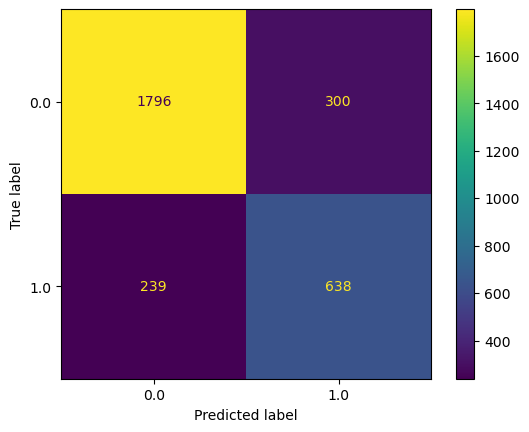

In [14]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_result, X_test, y_test)  

In [15]:
# Save the model
joblib.dump(grid_result, './../../data/models/logistic_regression.pkl')

['./../../data/models/logistic_regression.pkl']

## Model with oversample data

In [16]:
# Load the data
df = pd.read_csv('./../../data/engineered_data_oversampled.csv')

In [17]:
# Drop the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Model Building

In [19]:
# Declare the logistic regression model
logreg_clf = LogisticRegression(penalty='elasticnet', fit_intercept=True, class_weight='balanced', solver='saga')

# Declare the grid paramters to be searched
logreg_params = dict(
    C = np.logspace(-4, 4, num=9),
    max_iter = [100, 200, 500],
    l1_ratio = [0, 0.3, 0.6, 1]
)

In [ ]:
# Declare the gridsearch object
grid_search = GridSearchCV(logreg_clf, logreg_params, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=5)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

### Inferencing

In [21]:
# Get the best model parameters
print(f"Best score of {grid_result.best_score_} is achieved by using {grid_result.best_params_}")

Best score of 0.903027886164061 is achieved by using {'C': 10000.0, 'l1_ratio': 0, 'max_iter': 500}


In [22]:
# Predict on test data using the model
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)[:, 1]

### Evaluation

In [23]:
# Find the ROC AUC score
print(f"Area under the ROC curve: {roc_auc_score(y_test, y_score)}")

Area under the ROC curve: 0.903681663236619


With the new oversampled data, there is a marginal improvement in the performance of the logistic regression algorithm.

In [24]:
# Calculate parameters for roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

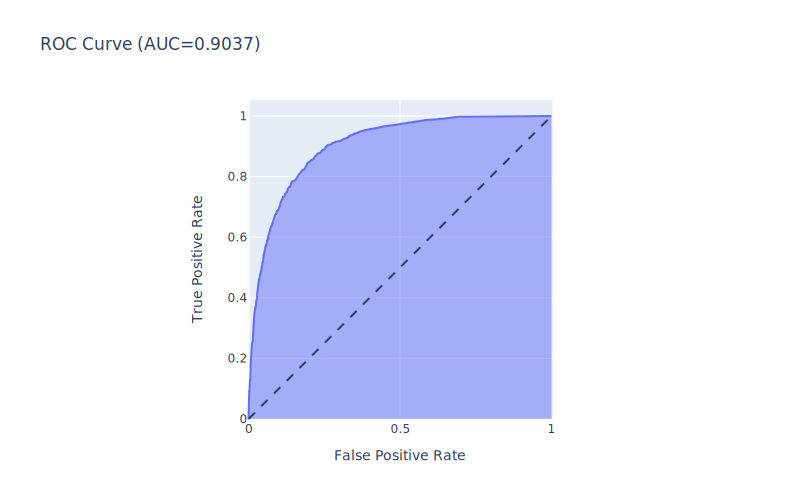

In [25]:
# Plot the curve and area under the curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [26]:
# Create a ROC dataframe from the obtained FPR and TPR
roc_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'threshold': thresholds
})

In [27]:
# Get the values of threshold for true positive rate between 0.79 and 0.81
roc_df[roc_df['tpr'].between(0.79, 0.81)]

,fpr,tpr,threshold
478,0.156835,0.792221,0.484183
479,0.157314,0.792221,0.484112
480,0.157314,0.793205,0.483855
481,0.159233,0.793205,0.483638
482,0.159233,0.794682,0.483299
483,0.159712,0.794682,0.483219
484,0.159712,0.797637,0.482520
485,0.161631,0.797637,0.482175
486,0.161631,0.799114,0.481655
487,0.162110,0.799114,0.481580


For this data set also, it is safe to assume the threshold of 0.5.

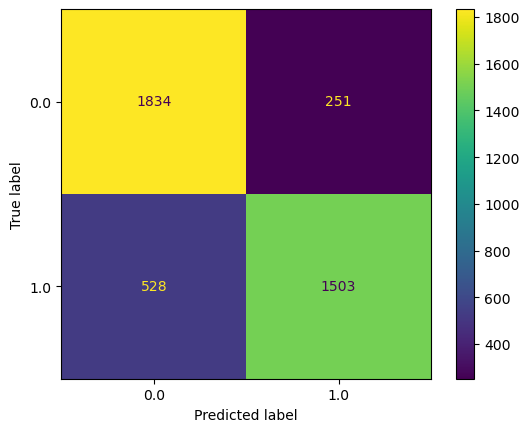

In [28]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_result, X_test, y_test)  

In [29]:
# Save the model
joblib.dump(grid_result, './../../data/models/logistic_regression_oversample.pkl')

['./../../data/models/logistic_regression_oversample.pkl']